En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.

1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=None

In [2]:
df = pd.read_csv('attacks_modificado_3.csv', index_col = 0)

In [3]:
df.head(2)

,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,Y,FATAL,03-Jun-2018


In [ ]:
#filtro
df['year'] >= 2015

In [ ]:
df_2015_on = df[df['year'] >= 2015]
df_2015_on

In [6]:
#comprobacion
df_2015_on['year'].unique()

array([2018., 2017., 2016., 2015.])

In [ ]:
# hacemos el group by - el número de personas que han hecho cada actividad en cada año.
df_2015_on.groupby(['year', 'activity'])['case_number'].count()

In [8]:
df_group = pd.DataFrame(df_2015_on.groupby(['year', 'activity'])['case_number'].count()).reset_index()
df_group.head(2)

,year,activity,case_number
0,2015.0,Body Boarding,1
1,2015.0,Body boarding,1


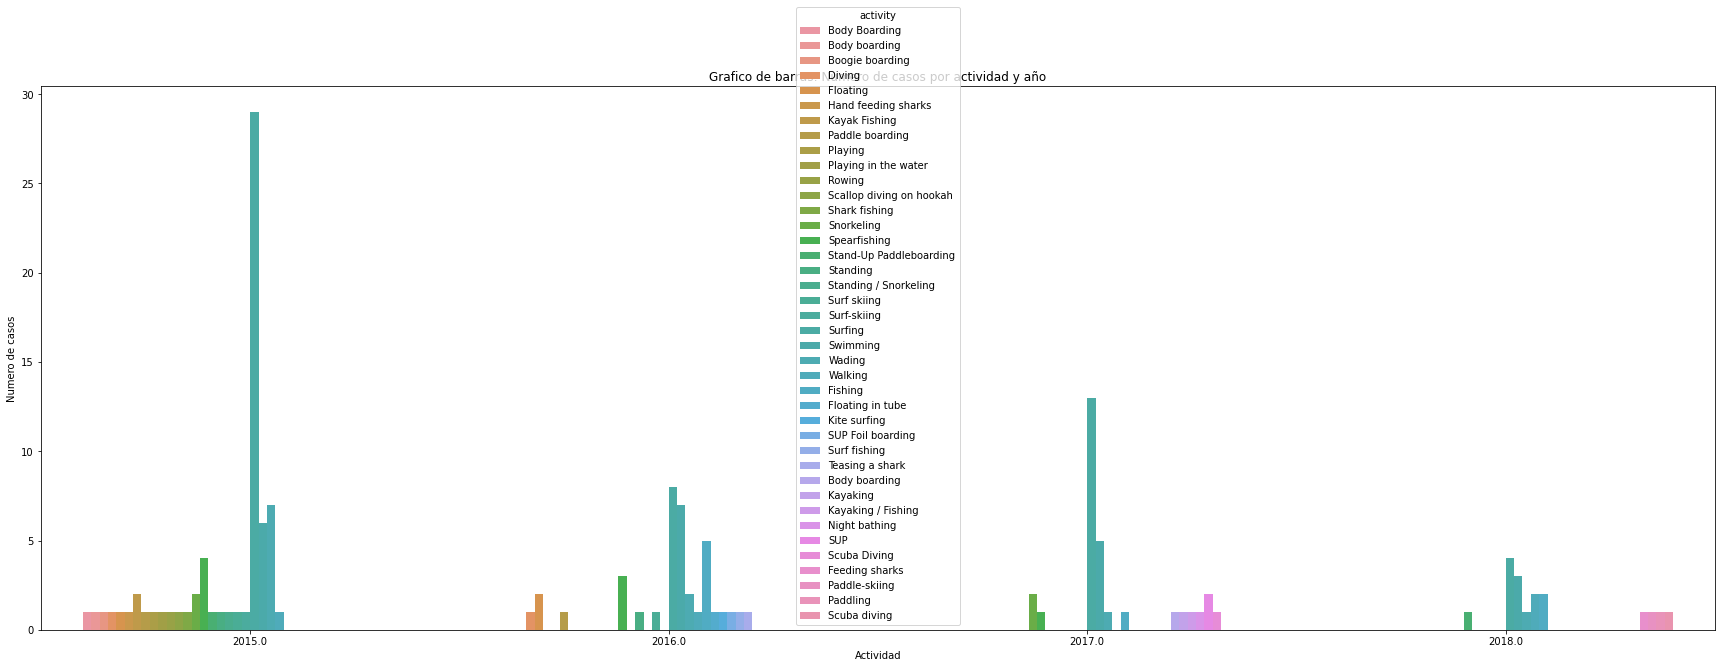

In [9]:
# Hacemos la grafica
plt.figure(figsize=(30,10))
fig = sns.barplot(x='year', y='case_number', data= df_group, hue= 'activity')
fig.set(xlabel='Actividad', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por actividad y año')
plt.show()

2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

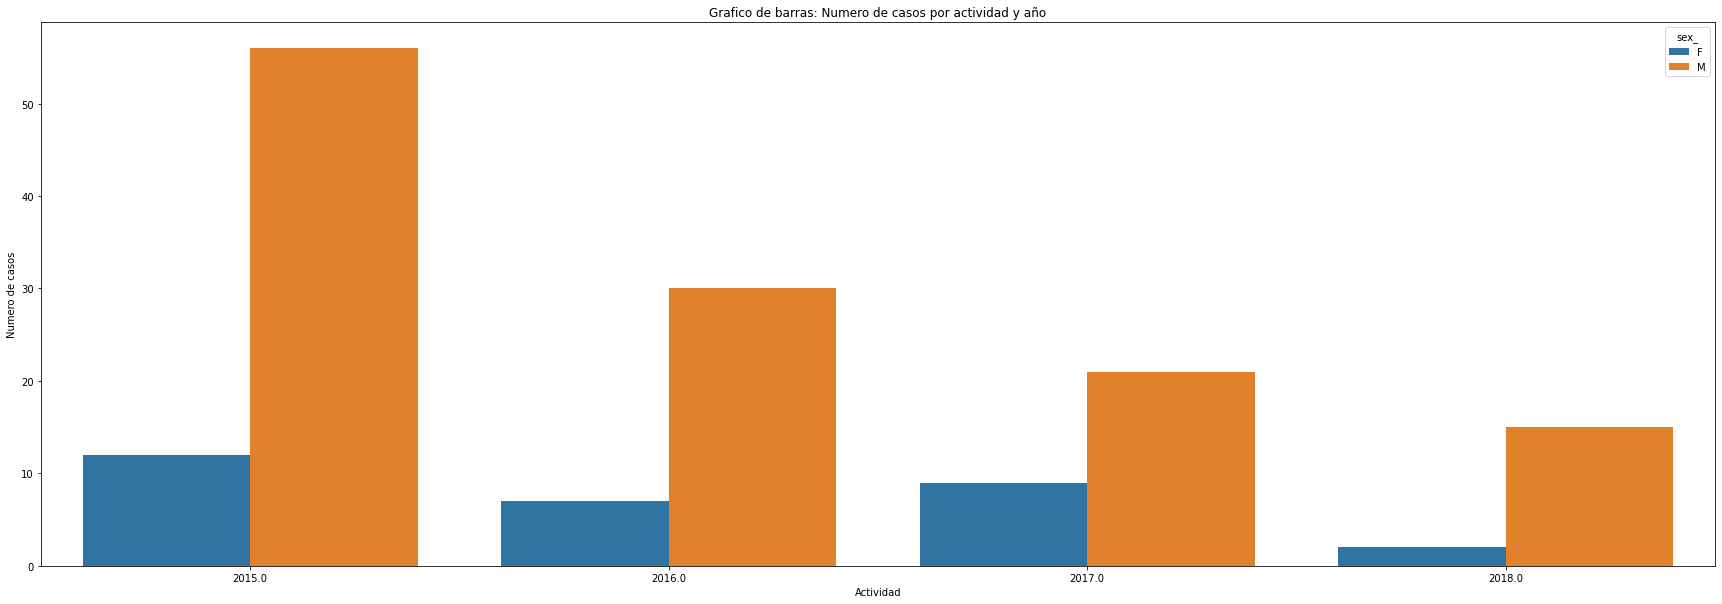

In [16]:
plt.figure(figsize=(30,10))
fig = sns.countplot(x='year', data= df_2015_on, hue= 'sex_')
fig.set(xlabel='Actividad', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por actividad y año')
plt.show()

In [13]:
df_group2 = pd.DataFrame(df_2015_on.groupby(['year', 'sex_'])['case_number'].count()).reset_index()
df_group2

,year,sex_,case_number
0,2015.0,F,12
1,2015.0,M,56
2,2016.0,F,7
3,2016.0,M,30
4,2017.0,F,9
5,2017.0,M,21
6,2018.0,F,2
7,2018.0,M,15


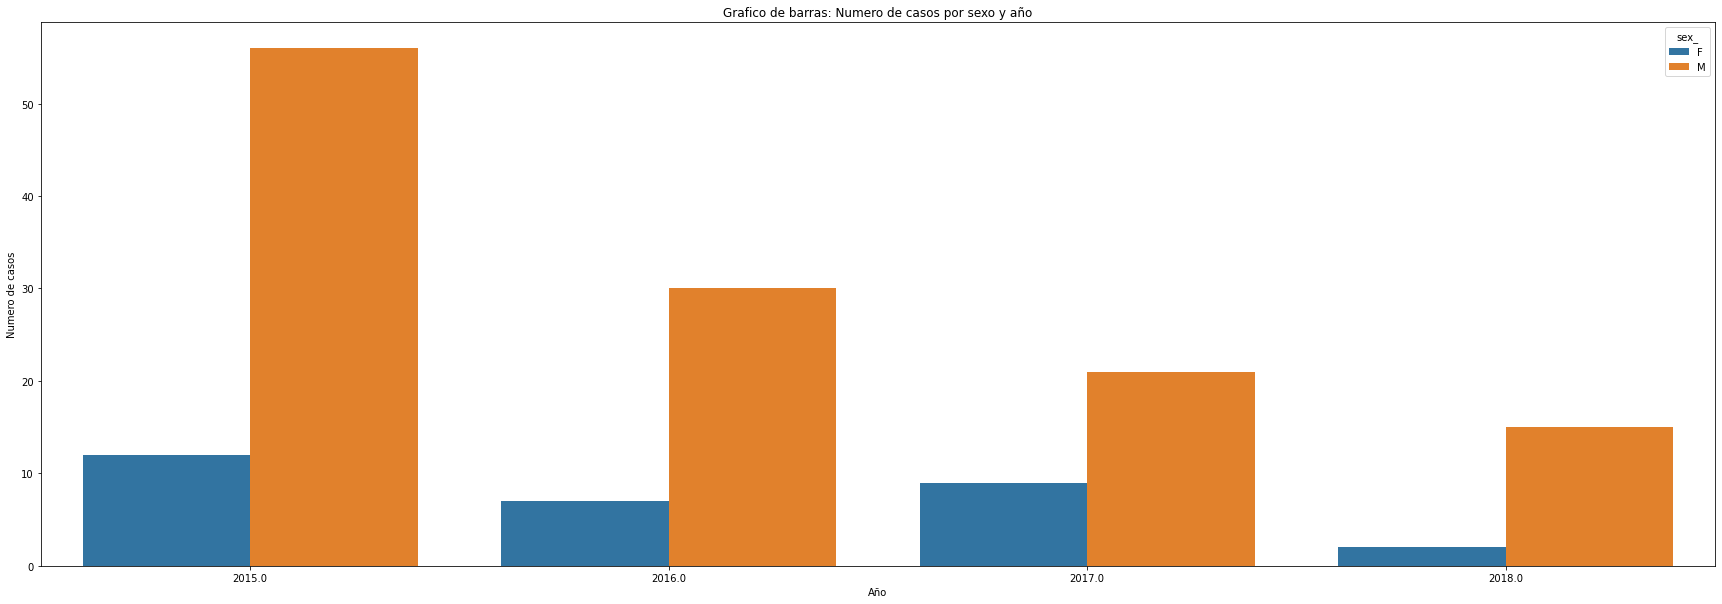

In [14]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='year', y='case_number', data= df_group2, hue= 'sex_')
fig.set(xlabel='Año', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por sexo y año')
plt.show()

3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [ ]:
df_1500_on= df[df['year']>=1500]

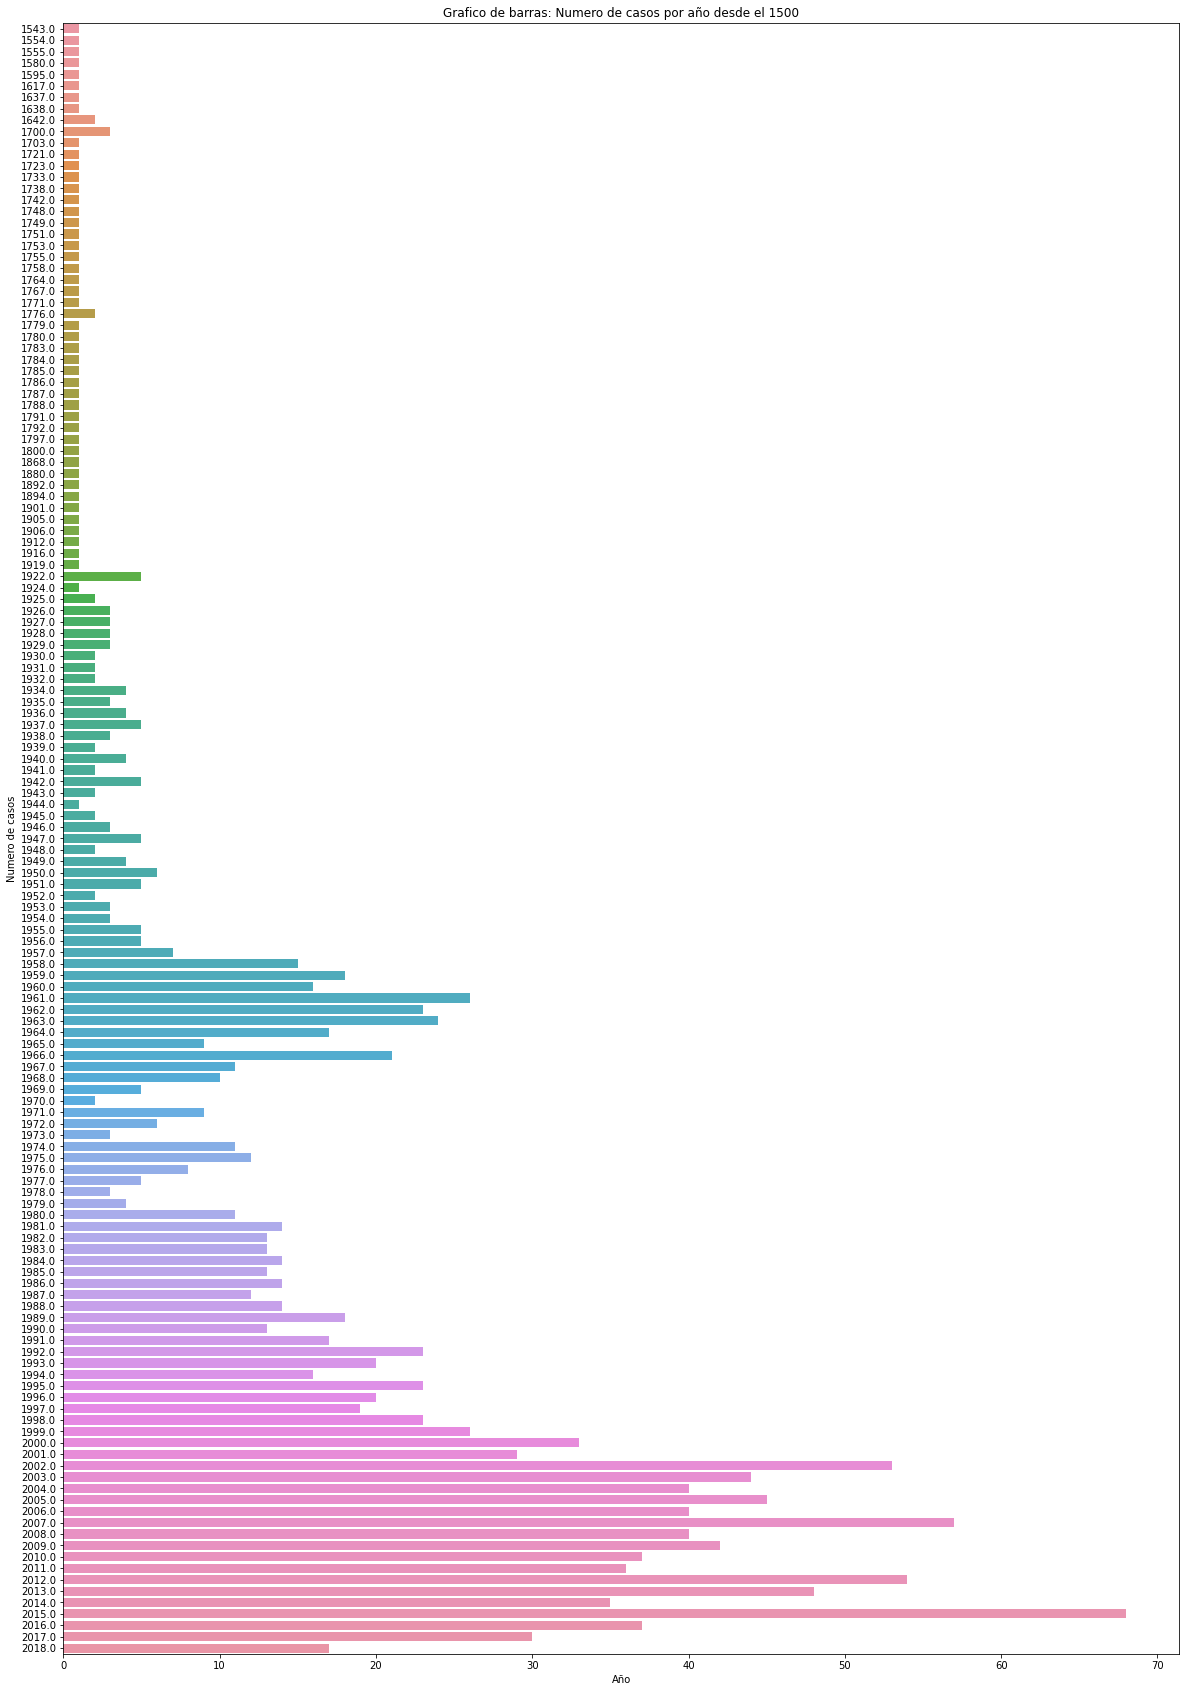

In [23]:
plt.figure(figsize=(20,30))
fig = sns.countplot(y='year', data= df_1500_on)
fig.set(xlabel='Año', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por año desde el 1500')
plt.show()

4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [27]:
df_pais = df[(df['country'].isin(['USA', 'AUSTRALIA', 'SOUTH AFRICA'])) & (df['year'] >= 1900)] 
df_pais.head()

,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
2,8,2018.05.26.b,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,Lower left leg bitten,26-May-2018
3,10,2018.05.24,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
6,21,2018.04.25.a,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,Rob Bruce,M,60,09h30,3 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury, knocked off board by shark",25-Apr-2018
8,24,2018.04.22,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,33,09h40,"White shark, 2.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury, shark bit hole in ski",22-Apr-2018


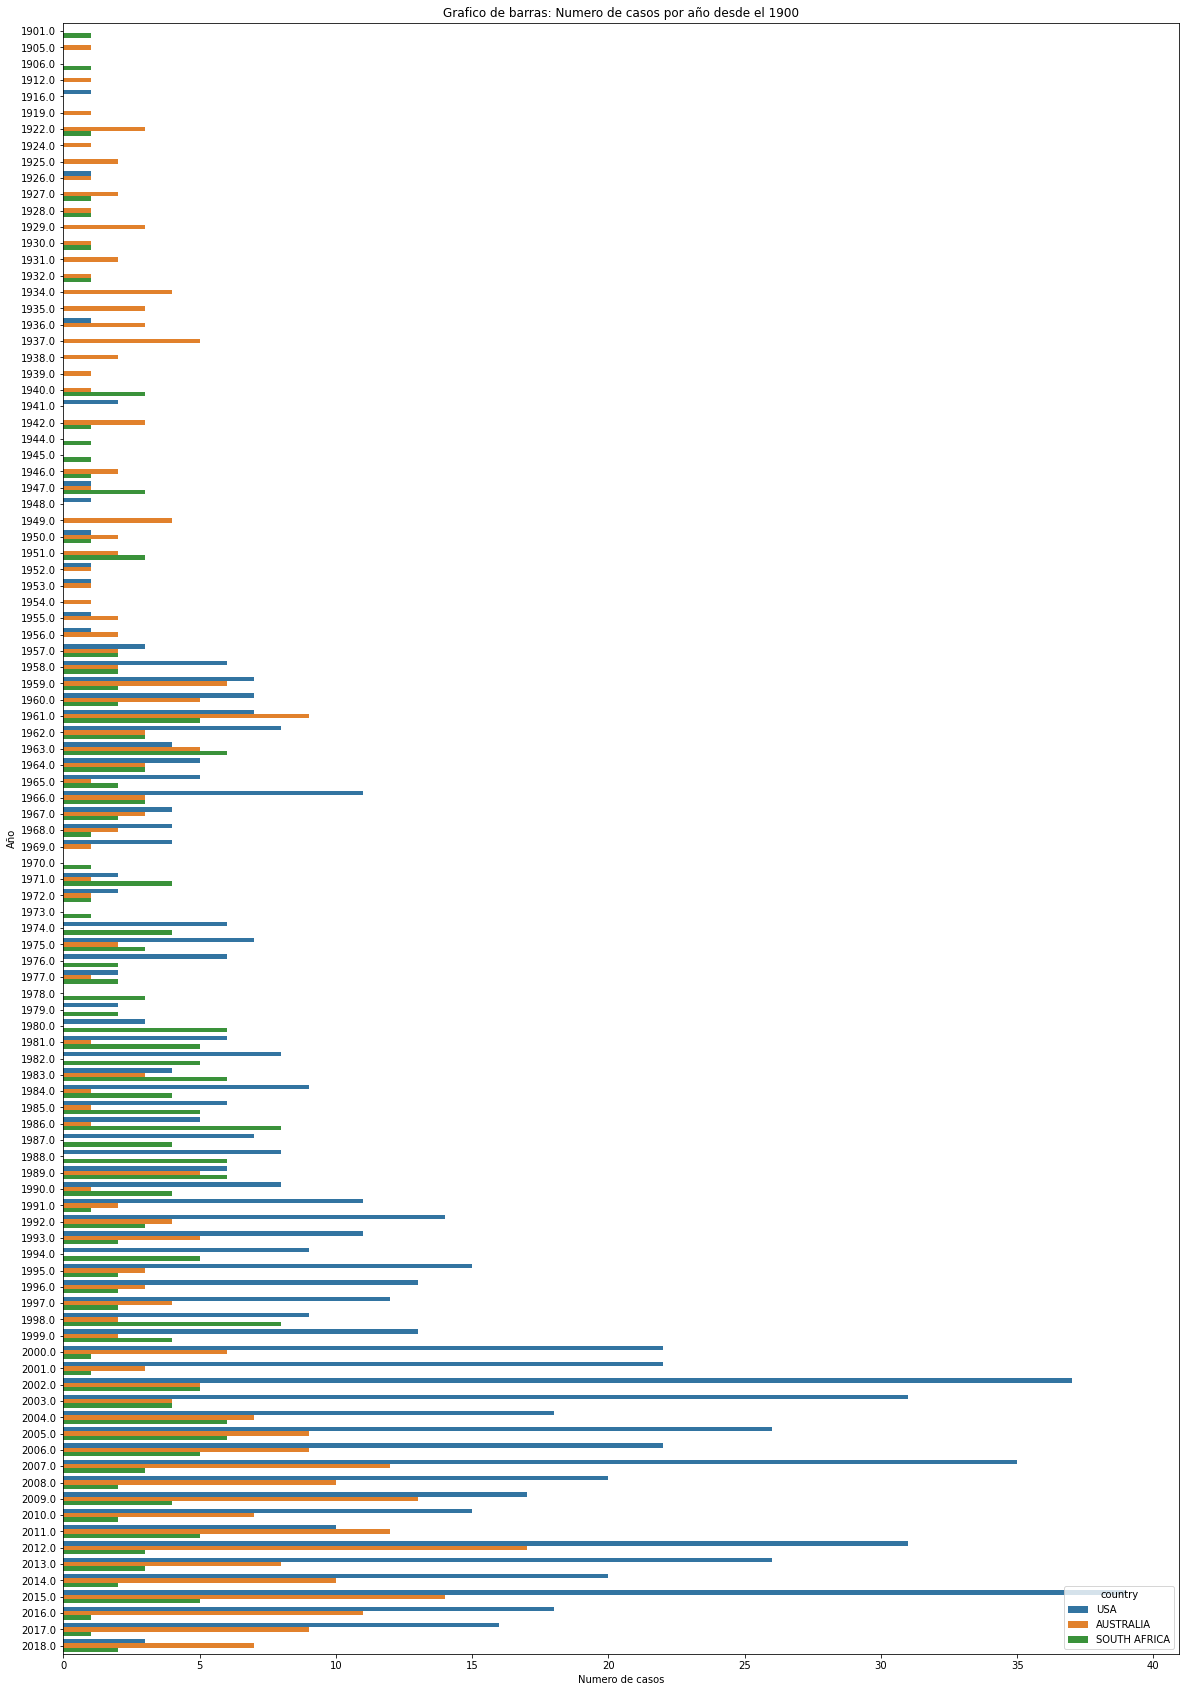

In [29]:
plt.figure(figsize=(20,30))
fig = sns.countplot(y='year', data= df_pais, hue= 'country')
fig.set(xlabel= 'Numero de casos', ylabel='Año' )
fig.set_title('Grafico de barras: Numero de casos por año desde el 1900')
plt.show()

5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [31]:
df_ataques_pais = df.groupby(['country'])['case_number'].count().reset_index()
df_ataques_pais.head(2)

,country,case_number
0,AMERICAN SAMOA,2
1,ARGENTINA,1


In [ ]:
df_ataques_pais.agg([media= 'mean'])

In [35]:
df_describe = df_ataques_pais.describe().reset_index()
df_describe

,index,case_number
0,count,95.000000
1,mean,17.494737
2,std,86.038818
3,min,1.000000
4,25%,1.000000
5,50%,2.000000
6,75%,4.000000
7,max,741.000000


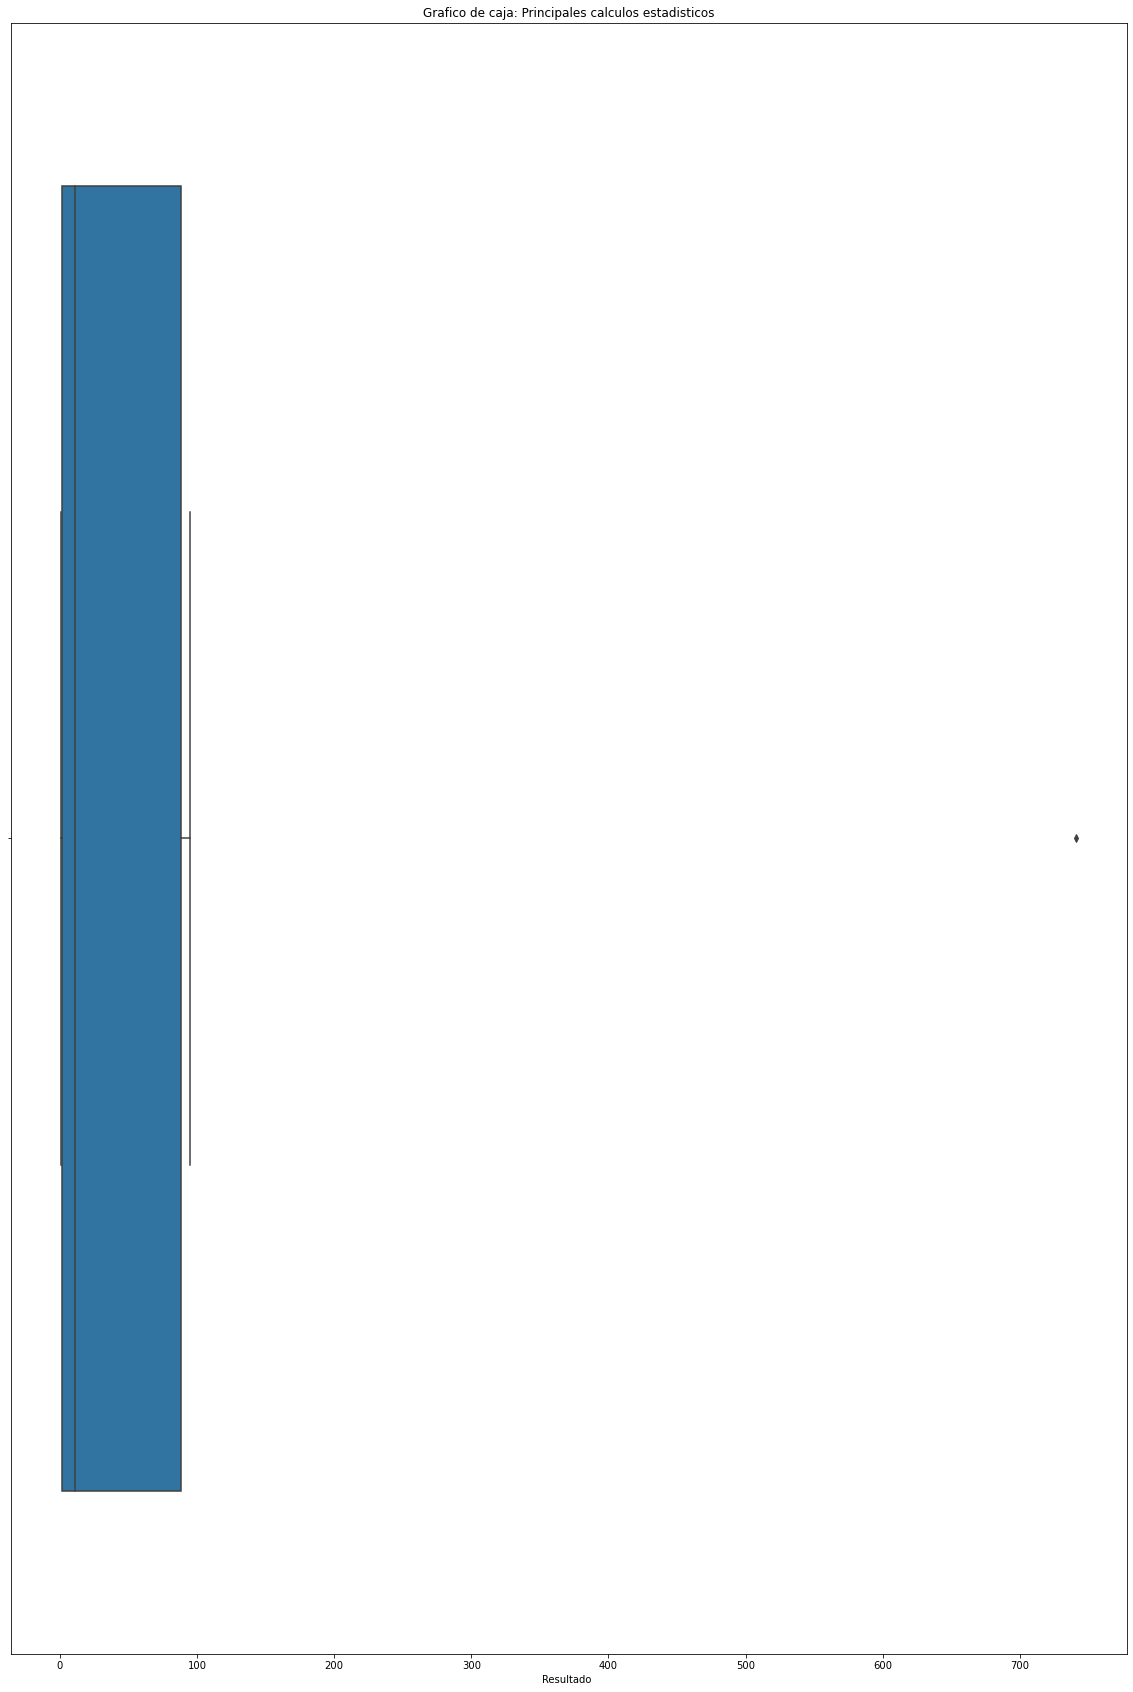

In [36]:
plt.figure(figsize=(20,30))
fig = sns.boxplot(x='case_number', data= df_describe, hue= 'index')
fig.set(xlabel= 'Resultado ' )
fig.set_title('Grafico de caja: Principales calculos estadisticos')
plt.show()